<h1>Hér verður farið í grunnin í Flux, og fittum við línu</h1>

In [64]:
# Einfalt módel
real(x) = 2x+1

x = [1:10...]
x = Matrix(hcat(x)') # 1x10 matrix

y = real.(x)


1×10 Matrix{Int64}:
 3  5  7  9  11  13  15  17  19  21

In [80]:
# Basic Flux
using Flux
using Statistics

model = Dense(1 => 1)
loss(model, x, y) = mean(abs2.(model(x) .- y)); # handwritten MSE

model(x) # not accurate at all

display(loss(model, x, y))

63.11557f0

In [81]:
# Training

opt = Descent(0.005)
data = [(x,y)]

epoch = 200_000

println("Before training: Loss = ",  loss(model, x,y))

for i = 1:epoch
    Flux.train!(loss, model, data, opt)
end

println("After training: Loss = ",  loss(model, x,y))

Before training: Loss = 63.11557


After training: Loss = 8.770371e-11


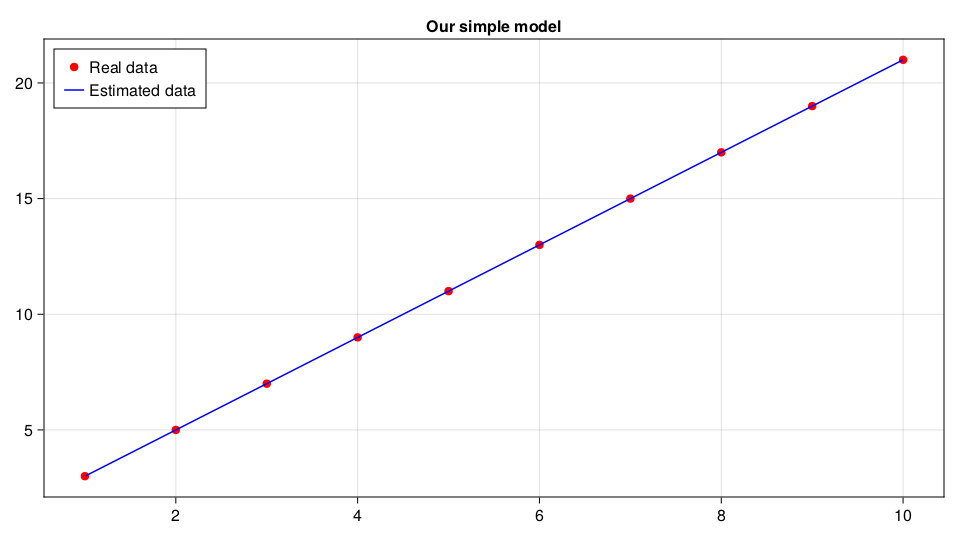

In [82]:
using CairoMakie

fig = Figure(resolution = (1920/2, 1080/2))
axis = Axis(fig[1,1], title="Our simple model")
real_plot = scatter!(axis, x[:],y[:], color =:red, label="Real data")
modeled_plot = lines!(axis, x[:],model(x)[:], color =:blue, label="Estimated data")
axislegend(axis,position=:lt)

fig

<h1>Bætum nú við noise</h1>

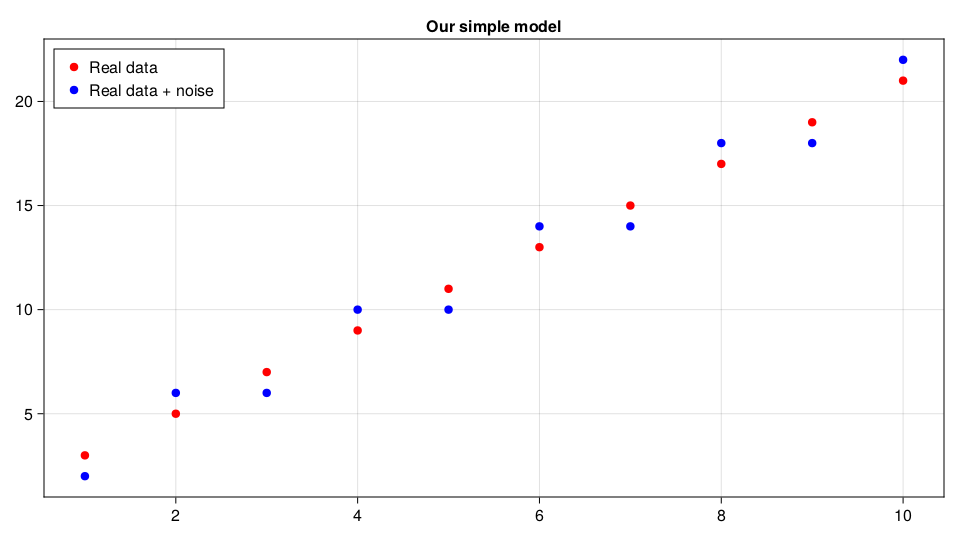

In [70]:
# Bætum við noise
y_noise = real.(x)

for i = 1:length(x)
    y_noise[1,i] = y_noise[1,i] + (-1)^i 
end

fig_noise = Figure(resolution = (1920/2, 1080/2))
axis = Axis(fig_noise_data_data_data[1,1], title="Our simple model")
real_plot = scatter!(axis, x[:],y[:], color =:red, label="Real data")
noise_plot = scatter!(axis, x[:],y_noise[:], color =:blue, label="Real data + noise")
axislegend(axis,position=:lt)

fig_noise

In [86]:
noise_model = Dense(1 => 1)
opt = Descent(0.005)
data = [(x,y_noise)]

epoch = 200_000

println("Before training: Loss = ",  loss(noise_model, x,y_noise))

for i = 1:epoch
    Flux.train!(loss, noise_model, data, opt)
end

println("After training: Loss = ",  loss(noise_model, x,y_noise))

Before training: Loss = 80.196625


After training: Loss = 0.9696969


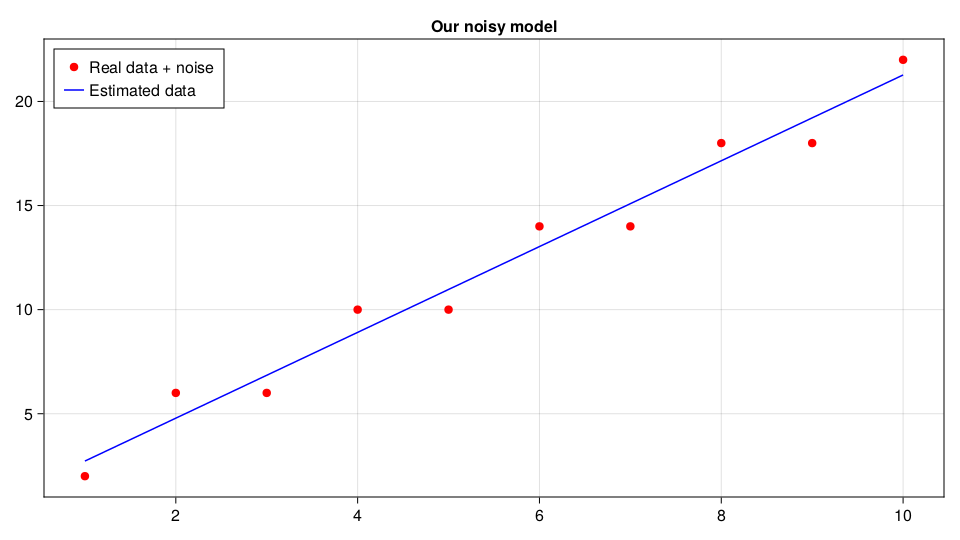

In [88]:
fig_noise_data = Figure(resolution = (1920/2, 1080/2))
axis = Axis(fig_noise_data[1,1], title="Our noisy model")
real_plot = scatter!(axis, x[:],y_noise[:], color =:red, label="Real data + noise")
estimated_plot = lines!(axis, x[:],noise_model(x)[:], color =:blue, label="Estimated data")
axislegend(axis,position=:lt)

fig_noise_data

<h1>Now we go crazy</h1><h2>Gerum fall sem fer í gegnum alla punkta, með hjálp relu</h2>

In [217]:
ultra_model = Chain(Dense(1 => 50, sigmoid), Dense(50 => 50, sigmoid), Dense(50=>1))

display(ultra_model)
display(loss(ultra_model, x,y_noise))

Chain(
  Dense(1 => 50, σ),                    # 100 parameters
  Dense(50 => 50, σ),                   # 2_550 parameters
  Dense(50 => 1),                       # 51 parameters
)                   # Total: 6 arrays, 2_701 parameters, 10.926 KiB.

190.69995f0

In [216]:
opt = Descent(0.01)
data = [(x,y_noise)]

epoch = 10

println("Before training: Loss = ",  loss(ultra_model, x,y_noise))

for i = 1:epoch
    Flux.train!(loss, ultra_model, data, opt)
end

loss(ultra_model, x,y_noise)

0.85248643f0

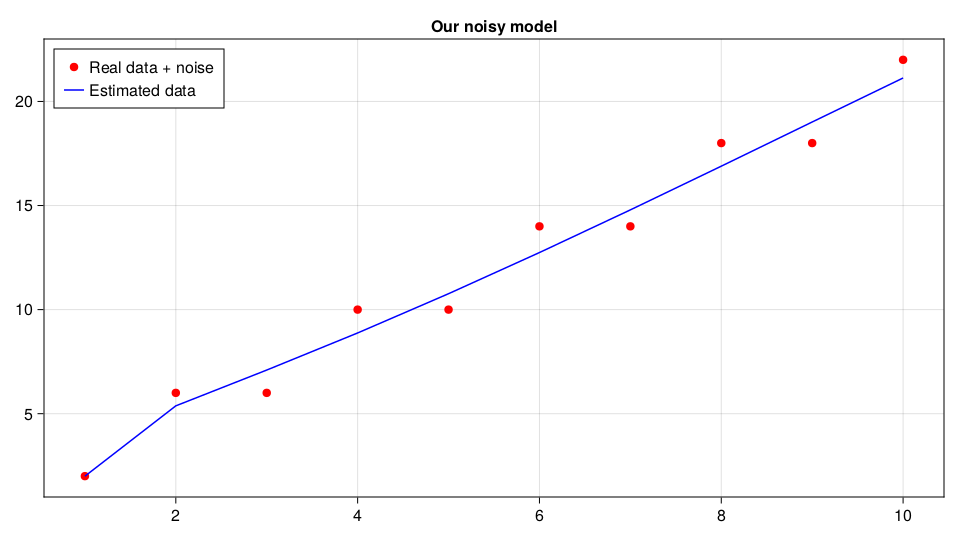

In [213]:
fig_ultra = Figure(resolution = (1920/2, 1080/2))
axis = Axis(fig_ultra[1,1], title="Our noisy model")
real_plot = scatter!(axis, x[:],y_noise[:], color =:red, label="Real data + noise")
estimated_plot = lines!(axis, x[:],ultra_model(x)[:], color =:blue, label="Estimated data")
axislegend(axis,position=:lt)

fig_ultra